In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.3)

In [2]:
df=pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## The target dependant value we are predicting is the Profit  which is based on the independent values which are the money spent on R&D, Administration, Marketing Spend, State,Profit.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [5]:
for col in df.columns:
    print(f'For column {col} \n--------------------\n')
    print(df[col].value_counts())
    print('\n')

For column R&D Spend 
--------------------

0.00         2
123334.88    1
165349.20    1
38558.51     1
46014.02     1
20229.59     1
130298.13    1
55493.95     1
542.05       1
91992.39     1
65605.48     1
23640.93     1
162597.70    1
131876.90    1
67532.53     1
61136.38     1
119943.24    1
76253.86     1
72107.60     1
28663.76     1
44069.95     1
66051.52     1
78013.11     1
91749.16     1
27892.92     1
93863.75     1
100671.96    1
1315.46      1
134615.46    1
28754.33     1
78389.47     1
153441.51    1
46426.07     1
114523.61    1
22177.74     1
101913.08    1
63408.86     1
15505.73     1
64664.71     1
77044.01     1
86419.70     1
120542.52    1
144372.41    1
73994.56     1
142107.34    1
94657.16     1
75328.87     1
61994.48     1
1000.23      1
Name: R&D Spend, dtype: int64


For column Administration 
--------------------

127382.30    1
148718.95    1
51743.15     1
153514.11    1
82982.09     1
110594.11    1
91391.77     1
129219.61    1
154806.14    1
84710

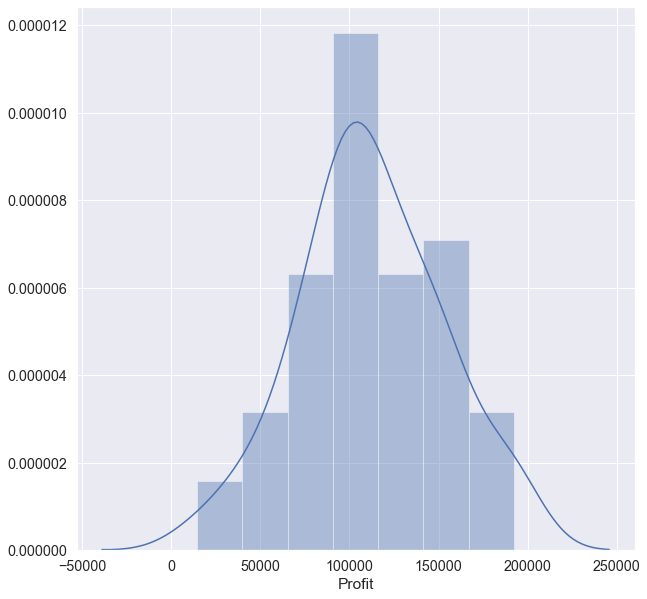

In [6]:
sns.distplot(df['Profit'],kde=True)

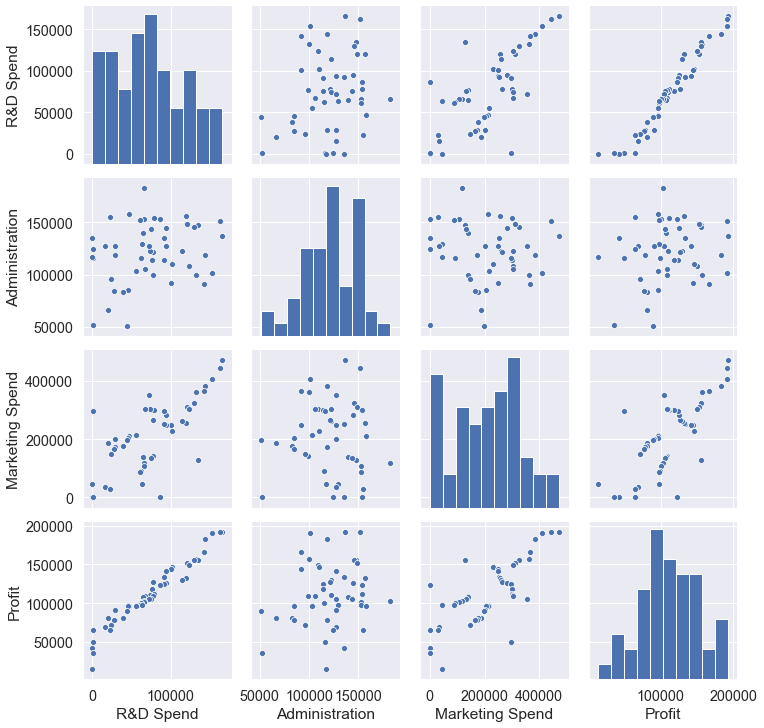

In [7]:
sns.pairplot(df)

## As you can see from the pairplot above that there is a positive strong correlation between Profits and money spent on R&D, also a weak positive correlation between profits and money spent on marketing, there appears to be no correlation between profits and money spent on administration.

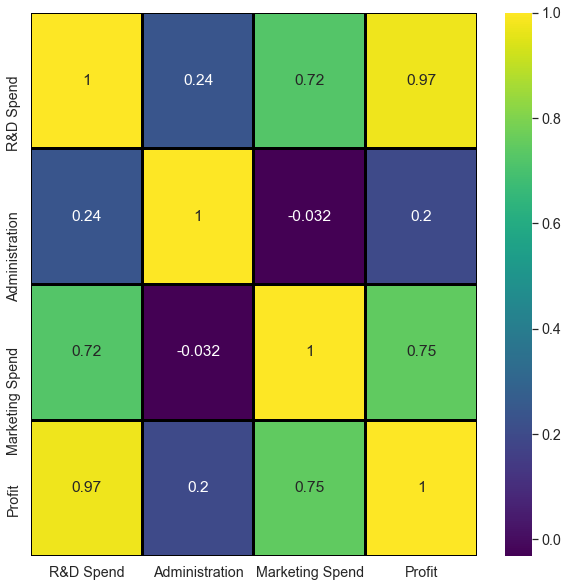

In [8]:
sns.heatmap(df.corr(),annot=True,linecolor='black',lw=2,cmap='viridis')

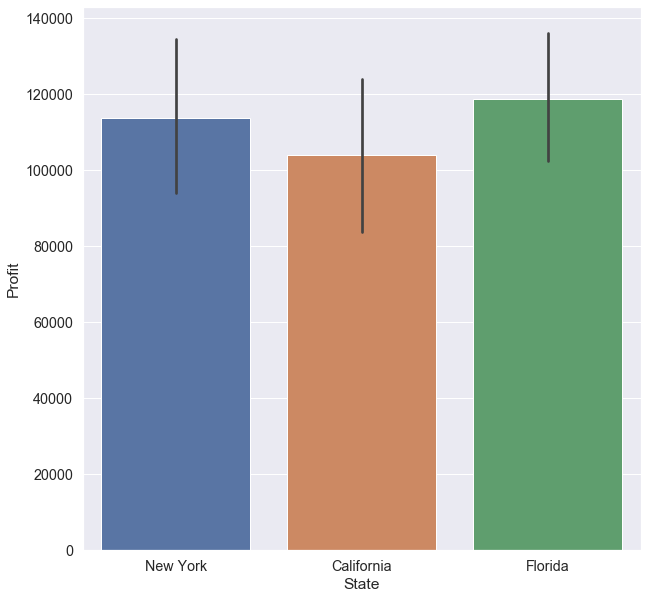

In [9]:
sns.barplot(x='State',y='Profit',estimator=np.mean,data=df)

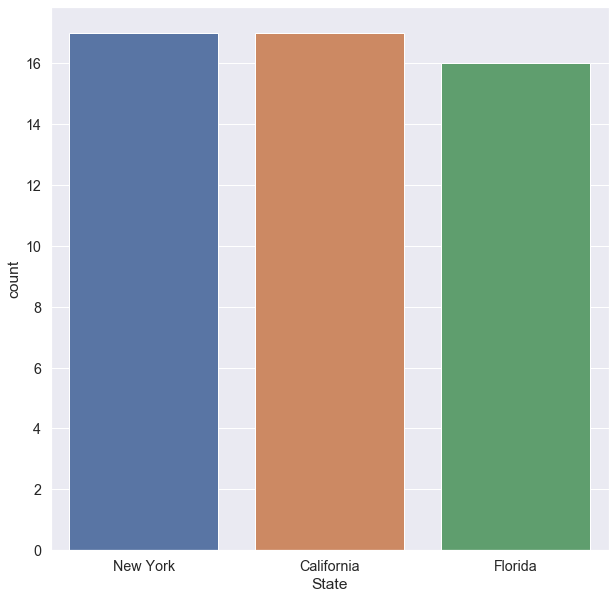

In [10]:
sns.countplot(x='State',data=df)

In [13]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [14]:
x=pd.get_dummies(data=x,drop_first=True)
x.head()

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.7,random_state=52)

In [16]:
lm=LinearRegression()
lm.fit(xtrain,ytrain)

LinearRegression()

In [17]:
ypred=lm.predict(xtest)

In [18]:
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
print(f'The r2 value of the regression is {r2_score(ytest,ypred)}')
print(f'The RMSE value of the regression is {sqrt(mean_squared_error(ytest,ypred))}')

The r2 value of the regression is 0.8986196992921341
The RMSE value of the regression is 12746.239814817336


In [19]:
lm.coef_

array([ 9.86962382e-01, -1.40576422e-01,  1.67355207e-02,  4.57551061e+03,
        5.88343465e+02])

In [20]:
lm.intercept_

49436.596070639935

In [21]:
pd.DataFrame(lm.coef_, x.columns, columns=["Coeff"])

,Coeff
R&D Spend,0.986962
Administration,-0.140576
Marketing Spend,0.016736
State_Florida,4575.510615
State_New York,588.343465


## Companies should invest more in Administration and Marketing to drive profits up

In [26]:
lm.predict([[20000, 18000, 22000, 0,0]]) # if state in California

array([67013.64958558])